In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.plotting.register_matplotlib_converters()
print('setup completed')

setup completed


In [4]:
#filepath = '../input/vehicle-data/train.csv'

In [5]:
df = pd.read_csv('C:/Users/Naman/Downloads/naman python/vehicle Project/train.csv')

In [6]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [7]:
df.shape

(233154, 41)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [9]:
dfc = df.copy()

### Feature Transformation

In [10]:
# Transform AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH features

In [11]:
dfc['AVERAGE.ACCT.AGE'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

In [12]:
dfc[['AVERAGE_ACCT_Year','AVERAGE_ACCT_Month']] = dfc['AVERAGE.ACCT.AGE'].str.split("yrs",expand=True)
dfc[['AVERAGE_ACCT_Month','AVERAGE_ACCT_newMonth']] = dfc['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
dfc["AVERAGE.ACCT.AGE"]= dfc["AVERAGE_ACCT_Year"].astype(str).astype(int)+((dfc["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
dfc = dfc.drop(columns= ["AVERAGE_ACCT_Year","AVERAGE_ACCT_Month",'AVERAGE_ACCT_newMonth'])

In [13]:
dfc['AVERAGE.ACCT.AGE'] = round(dfc['AVERAGE.ACCT.AGE'],2)

In [14]:
dfc['AVERAGE.ACCT.AGE'].head()

0    0.00
1    1.92
2    0.00
3    0.67
4    0.00
Name: AVERAGE.ACCT.AGE, dtype: float64

In [15]:
dfc[['CREDIT_HISTORY_LENGTH_Year','CREDIT_HISTORY_LENGTH_Month']] = dfc['CREDIT.HISTORY.LENGTH'].str.split("yrs",expand=True)
dfc[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = dfc['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
dfc["CREDIT.HISTORY.LENGTH"]= dfc["CREDIT_HISTORY_LENGTH_Year"].astype(str).astype(int)+((dfc["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
dfc = dfc.drop(columns= ["CREDIT_HISTORY_LENGTH_Year","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

In [16]:
dfc['CREDIT.HISTORY.LENGTH'] = round(dfc['CREDIT.HISTORY.LENGTH'],2)

In [270]:
dfc['CREDIT.HISTORY.LENGTH'].head()

0    0.00
1    1.92
2    0.00
3    1.25
4    0.00
Name: CREDIT.HISTORY.LENGTH, dtype: float64

In [271]:
# change PERFORM_CNS.SCORE.DESCRIPTION with its frequency

In [17]:
k = dfc['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts().index
v = dfc['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts().values
dt = {}
dt.update(zip(k,v)) 
dt

{'No Bureau History Available': 116950,
 'C-Very Low Risk': 16045,
 'A-Very Low Risk': 14124,
 'D-Very Low Risk': 11358,
 'B-Very Low Risk': 9201,
 'M-Very High Risk': 8776,
 'F-Low Risk': 8485,
 'K-High Risk': 8277,
 'H-Medium Risk': 6855,
 'E-Low Risk': 5821,
 'I-Medium Risk': 5557,
 'G-Low Risk': 3988,
 'Not Scored: Sufficient History Not Available': 3765,
 'J-High Risk': 3748,
 'Not Scored: Not Enough Info available on the customer': 3672,
 'Not Scored: No Activity seen on the customer (Inactive)': 2885,
 'Not Scored: No Updates available in last 36 months': 1534,
 'L-Very High Risk': 1134,
 'Not Scored: Only a Guarantor': 976,
 'Not Scored: More than 50 active Accounts found': 3}

In [18]:
dfc['PERFORM_CNS.SCORE.DESCRIPTION'] = dfc['PERFORM_CNS.SCORE.DESCRIPTION'].map(dt)

In [19]:
# Bin PERFORM_CNS.SCORE with 6 categories and later use label encoding to encode it

In [20]:
dfc['PERFORM_CNS.SCORE'].head()

0      0
1    598
2      0
3    305
4      0
Name: PERFORM_CNS.SCORE, dtype: int64

In [21]:
dfc['PERFORM_CNS.SCORE'] = dfc['PERFORM_CNS.SCORE'].apply(lambda x: 'Risky' if (x>= 0) & (x <= 300) else 'Low' if (x>= 301) & (x <= 600) else 'Fair' if (x>= 601) & (x <= 700) else 'Good' if (x>= 701) & (x <= 760) else 'Better' if (x>= 761) & (x <= 800) else 'Exgood')

In [22]:
dfc['PERFORM_CNS.SCORE'].value_counts().index

Index(['Risky', 'Good', 'Fair', 'Low', 'Exgood', 'Better'], dtype='object')

In [23]:
dt1 = {}
k1 = dfc['PERFORM_CNS.SCORE'].value_counts().index
v1 = [0,3,2,1,5,4]
dt1.update(zip(k1,v1))
dt1

{'Risky': 0, 'Good': 3, 'Fair': 2, 'Low': 1, 'Exgood': 5, 'Better': 4}

In [24]:
dfc['PERFORM_CNS.SCORE'] = dfc['PERFORM_CNS.SCORE'].map(dt1)
dfc['PERFORM_CNS.SCORE'].value_counts()

0    138561
3     28252
2     24300
1     18716
5     14373
4      8952
Name: PERFORM_CNS.SCORE, dtype: int64

In [25]:
# Drop Unnecessary columns

In [26]:
dfc = dfc.drop(['UniqueID','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID','Employee_code_ID','Date.of.Birth','DisbursalDate'],axis = 1)

In [27]:
print(dfc.shape)

(233154, 32)


### Data Type Conversion

In [28]:
dfc['Passport_flag'] = dfc['Passport_flag'].astype('object')
dfc['MobileNo_Avl_Flag'] = dfc['MobileNo_Avl_Flag'].astype('object')
dfc['Aadhar_flag'] = dfc['Aadhar_flag'].astype('object')
dfc['PAN_flag'] = dfc['PAN_flag'].astype('object')
dfc['VoterID_flag'] = dfc['VoterID_flag'].astype('object')
dfc['Driving_flag'] = dfc['Driving_flag'].astype('object')
dfc['PERFORM_CNS.SCORE'] = dfc['PERFORM_CNS.SCORE'].astype('object')

In [29]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   Employment.Type                      225493 non-null  object 
 4   MobileNo_Avl_Flag                    233154 non-null  object 
 5   Aadhar_flag                          233154 non-null  object 
 6   PAN_flag                             233154 non-null  object 
 7   VoterID_flag                         233154 non-null  object 
 8   Driving_flag                         233154 non-null  object 
 9   Passport_flag                        233154 non-null  object 
 10  PERFORM_CNS.SCORE                    233154 non-null  object 
 11  PERFORM_CNS.S

### Handling Missing Values

In [30]:
dfc.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
Employment.Type                        7661
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT                      0
SEC.NO.OF.ACCTS                           0
SEC.ACTIVE.ACCTS                          0
SEC.OVERDUE.ACCTS                         0
SEC.CURRENT.BALANCE                       0
SEC.SANCTIONED.AMOUNT           

In [31]:
dfc.dropna(axis = 0, inplace = True)

In [32]:
dfc.shape

(225493, 32)

### Feature Generation

In [33]:
# changing Employment.Type column
dfc['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [34]:
temp = pd.get_dummies(dfc['Employment.Type'])
temp.head()

,Salaried,Self employed
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [35]:
dfc[['Salaried', 'Self employed']] = temp[['Salaried', 'Self employed']]
dfc.drop('Employment.Type', axis = 1, inplace = True)

In [36]:
#secondary account values

In [37]:
dfc_new = dfc.copy()

In [38]:
dfc_new['SEC.NO.OF.ACCTS'].value_counts(normalize = True)[0:2]*100

0    97.444710
1     1.506033
Name: SEC.NO.OF.ACCTS, dtype: float64

In [39]:
dfc_new['SEC.ACTIVE.ACCTS'].value_counts(normalize = True)[0:2]*100

0    98.334316
1     1.169438
Name: SEC.ACTIVE.ACCTS, dtype: float64

In [40]:
dfc_new['SEC.OVERDUE.ACCTS'].value_counts(normalize = True)[0:2]*100

0    99.419051
1     0.489594
Name: SEC.OVERDUE.ACCTS, dtype: float64

In [41]:
dfc_new['SEC.CURRENT.BALANCE'].value_counts(normalize = True)[0:2]*100

0      98.531662
800     0.004435
Name: SEC.CURRENT.BALANCE, dtype: float64

In [42]:
dfc_new['SEC.SANCTIONED.AMOUNT'].value_counts(normalize = True)[0:2]*100

0        98.369351
50000     0.036365
Name: SEC.SANCTIONED.AMOUNT, dtype: float64

In [43]:
dfc_new['SEC.DISBURSED.AMOUNT'].value_counts(normalize = True)[0:2]*100

0        98.382655
50000     0.025721
Name: SEC.DISBURSED.AMOUNT, dtype: float64

In [44]:
dfc_new['SEC.INSTAL.AMT'].value_counts(normalize = True)[0:2]*100

0       99.033229
2100     0.003104
Name: SEC.INSTAL.AMT, dtype: float64

In [300]:
# we can see that in whole secondary account features, every feature has more then 98% zero values in them.
# therefore, it's better to drop these columns.Because these columns won't help in improving our predictions

In [45]:
dfc_new.drop(['SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
              'SEC.INSTAL.AMT'], axis = 1, inplace = True)

In [46]:
dfc_new.shape

(225493, 26)

In [47]:
#primary account values

In [48]:
dfc_new['PRI.NO.OF.ACCTS'].value_counts(normalize = True)[0:21].sum()*100

98.6287822681857

In [49]:
dfc_new['PRI.ACTIVE.ACCTS'].value_counts(normalize = True)[0:10].sum()*100

99.24831369488189

In [50]:
dfc_new['PRI.OVERDUE.ACCTS'].value_counts(normalize = True)[0:3].sum()*100

99.1272456351195

In [51]:
dfc_new['PRI.CURRENT.BALANCE'].value_counts(normalize = True)[0:100].sum()*100

61.699476258686516

In [52]:
dfc_new['PRI.SANCTIONED.AMOUNT'].value_counts(normalize = True)[0:100].sum()*100

68.94759482556

In [53]:
dfc_new['PRI.DISBURSED.AMOUNT'].value_counts(normalize = True)[0:100].sum()*100

68.10544008017985

In [54]:
dfc_new['PRIMARY.INSTAL.AMT'].value_counts(normalize = True)[0:100].sum()*100

70.61283498822579

In [55]:
# Generating column from PRI.OVERDUE.ACCTS

In [56]:
dfc_new['PRI.OVERDUE.ACCTS'].value_counts(normalize = True)

0     0.885628
1     0.086903
2     0.018741
3     0.005211
4     0.001769
5     0.000732
6     0.000426
7     0.000169
8     0.000115
9     0.000106
11    0.000053
12    0.000035
10    0.000027
13    0.000022
14    0.000022
17    0.000009
18    0.000009
15    0.000004
16    0.000004
19    0.000004
23    0.000004
25    0.000004
Name: PRI.OVERDUE.ACCTS, dtype: float64

In [57]:
dfc_new['PRI.OVERDUE.ACCTS'] = dfc_new['PRI.OVERDUE.ACCTS'].apply(lambda x: 'ZERO.PRI.OVERDUE.ACCTS' if x ==0 else 'ATLEAST.ONE.PRI.OVERDUE.ACCTS')

In [58]:
dfc_new['PRI.OVERDUE.ACCTS'].value_counts(normalize = True)

ZERO.PRI.OVERDUE.ACCTS           0.885628
ATLEAST.ONE.PRI.OVERDUE.ACCTS    0.114372
Name: PRI.OVERDUE.ACCTS, dtype: float64

In [59]:
temp = pd.get_dummies(dfc_new['PRI.OVERDUE.ACCTS'])
temp.head()

,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [60]:
dfc_new[['ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'ZERO.PRI.OVERDUE.ACCTS']] = temp[['ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'ZERO.PRI.OVERDUE.ACCTS']]

In [61]:
dfc_new.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Salaried,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0,0,0.00,0.00,0,0,1,0,0,1
1,47145,65550,73.23,1,1,0,0,0,0,1,...,0,1,1.92,1.92,0,1,0,1,1,0
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0,0,0.00,0.00,0,0,0,1,0,1
3,57513,66113,88.48,1,1,0,0,0,0,1,...,0,0,0.67,1.25,1,1,0,1,0,1
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0,0,0.00,0.00,1,1,0,1,0,1


In [62]:
dfc_new.drop('PRI.OVERDUE.ACCTS', axis = 1, inplace = True)

In [63]:
dfc_new.shape

(225493, 27)

In [64]:
# Generating column from #NEW.ACCTS.IN.LAST.SIX.MONTHS

In [65]:
dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)[0:2].sum()*100

91.49064494241507

In [66]:
dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)

0     0.775829
1     0.139077
2     0.047922
3     0.019402
4     0.008506
5     0.004200
6     0.002098
7     0.001299
8     0.000634
9     0.000346
10    0.000239
11    0.000133
12    0.000089
13    0.000067
14    0.000049
16    0.000027
17    0.000022
15    0.000009
18    0.000009
19    0.000009
20    0.000009
23    0.000009
21    0.000004
22    0.000004
28    0.000004
35    0.000004
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [67]:
dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'] = dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'].apply(lambda x: 'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS' if x ==0 else 'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS')

In [68]:
dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)

ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS           0.775829
ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS    0.224171
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [69]:
temp2 = pd.get_dummies(dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'])
temp2.head()


,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [70]:
dfc_new[['ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS', 'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS']] = temp2[['ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS', 'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS']]

In [71]:
dfc_new.drop('NEW.ACCTS.IN.LAST.SIX.MONTHS', axis = 1, inplace = True)

In [72]:
dfc_new.shape

(225493, 28)

In [73]:
# Generating column from #DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS

In [74]:
dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)[0:2]

0    0.920858
1    0.065102
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [75]:
dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)

0     0.920858
1     0.065102
2     0.010666
3     0.002302
4     0.000603
5     0.000248
6     0.000089
7     0.000053
8     0.000031
11    0.000013
12    0.000013
9     0.000009
10    0.000009
20    0.000004
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [76]:
dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] = dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].apply(lambda x: 'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS' if x ==0 else 'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS')

In [77]:
dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)

ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS           0.920858
ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.079142
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [78]:
temp3 = pd.get_dummies(dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'])
temp3.head()


,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [79]:
dfc_new[['ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']] = temp3[['ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']]

dfc_new.drop('DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', axis = 1, inplace = True)

In [80]:
dfc_new.shape

(225493, 29)

In [81]:
# Generating columns from NO.OF_INQUIRIES'

In [82]:
dfc_new['NO.OF_INQUIRIES'].value_counts(normalize = True)[0:3]

0    0.864728
1    0.096650
2    0.023477
Name: NO.OF_INQUIRIES, dtype: float64

In [83]:
dfc_new['NO.OF_INQUIRIES'] = dfc_new['NO.OF_INQUIRIES'].apply(lambda x: 'ZERO.NO.OF_INQUIRIES' if x ==0 else 'ATLEAST.ONE.NO.OF_INQUIRIES')


In [84]:
dfc_new['NO.OF_INQUIRIES'].value_counts(normalize = True)

ZERO.NO.OF_INQUIRIES           0.864728
ATLEAST.ONE.NO.OF_INQUIRIES    0.135272
Name: NO.OF_INQUIRIES, dtype: float64

In [85]:
temp5 = pd.get_dummies(dfc_new['NO.OF_INQUIRIES'])
temp5.head()

,ATLEAST.ONE.NO.OF_INQUIRIES,ZERO.NO.OF_INQUIRIES
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [86]:
dfc_new[['ATLEAST.ONE.NO.OF_INQUIRIES', 'ZERO.NO.OF_INQUIRIES']] = temp5[['ATLEAST.ONE.NO.OF_INQUIRIES', 'ZERO.NO.OF_INQUIRIES']]


In [87]:

dfc_new.drop('NO.OF_INQUIRIES', axis = 1, inplace = True)

In [88]:
dfc_new.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,Salaried,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.NO.OF_INQUIRIES,ZERO.NO.OF_INQUIRIES
0,50578,58400,89.55,1,1,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,1
1,47145,65550,73.23,1,1,0,0,0,0,1,...,0,1,1,0,0,1,1,0,0,1
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
3,57513,66113,88.48,1,1,0,0,0,0,1,...,0,1,0,1,0,1,0,1,1,0
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0


In [89]:
# other features

In [90]:
dfc_new['Passport_flag'].value_counts(normalize = True)[0:2]

0    0.997862
1    0.002138
Name: Passport_flag, dtype: float64

In [91]:
# as ~99% values are 0. It's better to drop this feature

In [92]:
dfc_new['Driving_flag'].value_counts(normalize = True)[0:2]

0    0.976314
1    0.023686
Name: Driving_flag, dtype: float64

In [93]:
# as ~97% values are 0. It's better to drop this feature

In [94]:
dfc_new['VoterID_flag'].value_counts(normalize = True)[0:2]

0    0.852873
1    0.147127
Name: VoterID_flag, dtype: float64

In [95]:
dfc_new['PAN_flag'].value_counts(normalize = True)[0:2]

0    0.922614
1    0.077386
Name: PAN_flag, dtype: float64

In [96]:
# as ~92% values are 0. It's better to drop this feature

In [97]:
dfc_new['Aadhar_flag'].value_counts(normalize = True)[0:2]

1    0.83772
0    0.16228
Name: Aadhar_flag, dtype: float64

In [98]:
dfc_new['MobileNo_Avl_Flag'].value_counts(normalize = True)[0:2]

1    1.0
Name: MobileNo_Avl_Flag, dtype: float64

In [99]:
# as all values are 1. It's better to drop this feature

In [100]:
dfc_new.drop(['MobileNo_Avl_Flag','PAN_flag', 'Driving_flag', 'Passport_flag'], axis = 1, inplace = True)

In [101]:
dfc_new.shape

(225493, 26)

In [102]:
dfc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 26 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   disbursed_amount                                 225493 non-null  int64  
 1   asset_cost                                       225493 non-null  int64  
 2   ltv                                              225493 non-null  float64
 3   Aadhar_flag                                      225493 non-null  object 
 4   VoterID_flag                                     225493 non-null  object 
 5   PERFORM_CNS.SCORE                                225493 non-null  object 
 6   PERFORM_CNS.SCORE.DESCRIPTION                    225493 non-null  int64  
 7   PRI.NO.OF.ACCTS                                  225493 non-null  int64  
 8   PRI.ACTIVE.ACCTS                                 225493 non-null  int64  
 9   PRI.CURRENT.BAL

### Outliers Detection

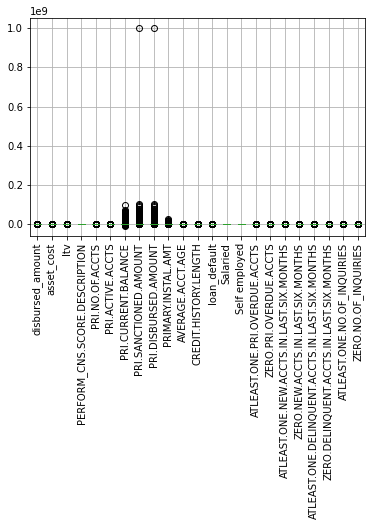

In [103]:
dfc_new.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [104]:
# As there are only few features that have outliers, also outliers here seems to be important for further 
# analysis and feature selection. Hence, we are not dropping outliers.

In [105]:
df_new = dfc_new.copy()

In [106]:
df_new['loan_default'].value_counts(normalize = True)

0    0.782845
1    0.217155
Name: loan_default, dtype: float64

In [107]:
(df_new[df_new['loan_default'] == 0]['PRI.NO.OF.ACCTS'].value_counts(normalize = True)[0:20]*0.78)

0     0.379223
1     0.117619
2     0.067441
3     0.045074
4     0.032733
5     0.025217
6     0.019508
7     0.015492
8     0.012522
9     0.010110
10    0.008320
11    0.006836
12    0.005537
13    0.004936
14    0.004008
15    0.003385
16    0.002890
17    0.002320
18    0.002050
19    0.001825
Name: PRI.NO.OF.ACCTS, dtype: float64

In [108]:
#checking proportion of Primary active accounts with respect to defaulters and non defaulters separately

In [109]:
((df_new[df_new['loan_default'] == 0]['PRI.ACTIVE.ACCTS'].value_counts(normalize = True))*100)/100*78

0      44.866592
1      14.185956
2       7.387920
3       4.246287
4       2.632609
5       1.634887
6       1.003025
7       0.665001
8       0.442745
9       0.282791
10      0.193977
11      0.124605
12      0.087930
13      0.067163
14      0.045954
15      0.036233
16      0.020326
17      0.019442
18      0.013256
19      0.011047
20      0.005302
21      0.003977
23      0.003535
22      0.003093
26      0.002651
24      0.002209
25      0.002209
28      0.001767
27      0.001326
31      0.000884
34      0.000884
37      0.000884
42      0.000442
52      0.000442
43      0.000442
144     0.000442
39      0.000442
35      0.000442
32      0.000442
65      0.000442
Name: PRI.ACTIVE.ACCTS, dtype: float64

In [110]:
(df_new[df_new['loan_default'] == 1]['PRI.ACTIVE.ACCTS'].value_counts(normalize = True)[0:10]*0.22)

0    0.134133
1    0.040188
2    0.019849
3    0.010936
4    0.006056
5    0.003356
6    0.002116
7    0.001173
8    0.000759
9    0.000449
Name: PRI.ACTIVE.ACCTS, dtype: float64

In [111]:
a = df_new[df_new['loan_default'] == 0].index
a = list(a)

b = df_new[df_new['loan_default'] == 1].index
b = list(b)


In [112]:
s_nd = df_new[df_new['loan_default'] == 0][df_new[df_new['loan_default'] == 0].index == a]
s_nd.head()

,disbursed_amount,asset_cost,ltv,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE,...,Salaried,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.NO.OF_INQUIRIES,ZERO.NO.OF_INQUIRIES
0,50578,58400,89.55,1,0,0,116950,0,0,0,...,1,0,0,1,0,1,0,1,0,1
2,53278,61360,89.63,1,0,0,116950,0,0,0,...,0,1,0,1,0,1,0,1,0,1
5,54513,61900,89.66,1,0,5,14124,2,0,0,...,0,1,0,1,0,1,0,1,0,1
6,46349,61500,76.42,1,0,0,116950,0,0,0,...,1,0,0,1,0,1,0,1,0,1
7,43894,61900,71.89,1,0,0,3672,1,1,72879,...,1,0,0,1,0,1,0,1,0,1


In [113]:
df_new['PRI.ACTIVE.ACCTS.CAT'] = s_nd['PRI.ACTIVE.ACCTS'].apply(lambda x: 2 if x< 1 else 3 if (x>=1 and x<=2) else 4 if (x >=3 and x <=4) else 5)

In [114]:
s_d = df_new[df_new['loan_default'] == 1][df_new[df_new['loan_default'] == 1].index == b]
s_d.head()

,disbursed_amount,asset_cost,ltv,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE,...,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.NO.OF_INQUIRIES,ZERO.NO.OF_INQUIRIES,PRI.ACTIVE.ACCTS.CAT
1,47145,65550,73.23,1,0,1,5557,1,1,27600,...,1,1,0,0,1,1,0,0,1,NaN
3,57513,66113,88.48,1,0,1,1134,3,0,0,...,1,0,1,0,1,0,1,1,0,NaN
4,52378,60300,88.39,1,0,0,116950,0,0,0,...,1,0,1,0,1,0,1,1,0,NaN
10,53278,61230,89.83,1,0,0,8776,1,0,0,...,1,0,1,0,1,0,1,0,1,NaN
12,53278,61330,89.68,0,1,0,8776,7,2,0,...,0,1,0,0,1,0,1,0,1,NaN


In [115]:
df_new['PRI.ACTIVE.ACCTS.CAT2'] = s_d['PRI.ACTIVE.ACCTS'].apply(lambda x: 2 if x< 1 else 6 if (x>= 1 and x<=2) else 7)

In [116]:
df_new.isnull().sum()

disbursed_amount                                        0
asset_cost                                              0
ltv                                                     0
Aadhar_flag                                             0
VoterID_flag                                            0
PERFORM_CNS.SCORE                                       0
PERFORM_CNS.SCORE.DESCRIPTION                           0
PRI.NO.OF.ACCTS                                         0
PRI.ACTIVE.ACCTS                                        0
PRI.CURRENT.BALANCE                                     0
PRI.SANCTIONED.AMOUNT                                   0
PRI.DISBURSED.AMOUNT                                    0
PRIMARY.INSTAL.AMT                                      0
AVERAGE.ACCT.AGE                                        0
CREDIT.HISTORY.LENGTH                                   0
loan_default                                            0
Salaried                                                0
Self employed 

In [117]:
df_new['PRI.ACTIVE.ACCTS.CAT'] = df_new['PRI.ACTIVE.ACCTS.CAT'].fillna(0)
df_new['PRI.ACTIVE.ACCTS.CAT2'] = df_new['PRI.ACTIVE.ACCTS.CAT2'].fillna(0)

In [118]:
df_new['PRI.ACTIVE.ACCTS.CATEGORY'] = df_new['PRI.ACTIVE.ACCTS.CAT'] + df_new['PRI.ACTIVE.ACCTS.CAT2']

In [119]:
df_new['PRI.ACTIVE.ACCTS.CATEGORY'].value_counts()

2.0    131395
3.0     48825
4.0     15568
6.0     13363
5.0     10593
7.0      5749
Name: PRI.ACTIVE.ACCTS.CATEGORY, dtype: int64

In [120]:
df_new[df_new['loan_default'] == 0]['PRI.ACTIVE.ACCTS.CATEGORY'].value_counts(normalize = True)*0.78

2.0    0.448666
3.0    0.215739
4.0    0.068789
5.0    0.046806
Name: PRI.ACTIVE.ACCTS.CATEGORY, dtype: float64

In [121]:
df_new[df_new['loan_default'] == 1]['PRI.ACTIVE.ACCTS.CATEGORY'].value_counts(normalize = True)*0.22

2.0    0.134133
6.0    0.060038
7.0    0.025829
Name: PRI.ACTIVE.ACCTS.CATEGORY, dtype: float64

In [122]:
df_new.drop(['PRI.ACTIVE.ACCTS.CAT','PRI.ACTIVE.ACCTS.CAT2'], axis = 1, inplace = True)

In [123]:
df_new.shape

(225493, 27)

In [124]:
df_new[['loan_default', 'PRI.ACTIVE.ACCTS.CATEGORY']].corr() 

,loan_default,PRI.ACTIVE.ACCTS.CATEGORY
loan_default,1.000000,0.324846
PRI.ACTIVE.ACCTS.CATEGORY,0.324846,1.000000


In [125]:
# as you can see we have created a new feature which have 0.32 correlation value with the target

### Checking Multicollinearity

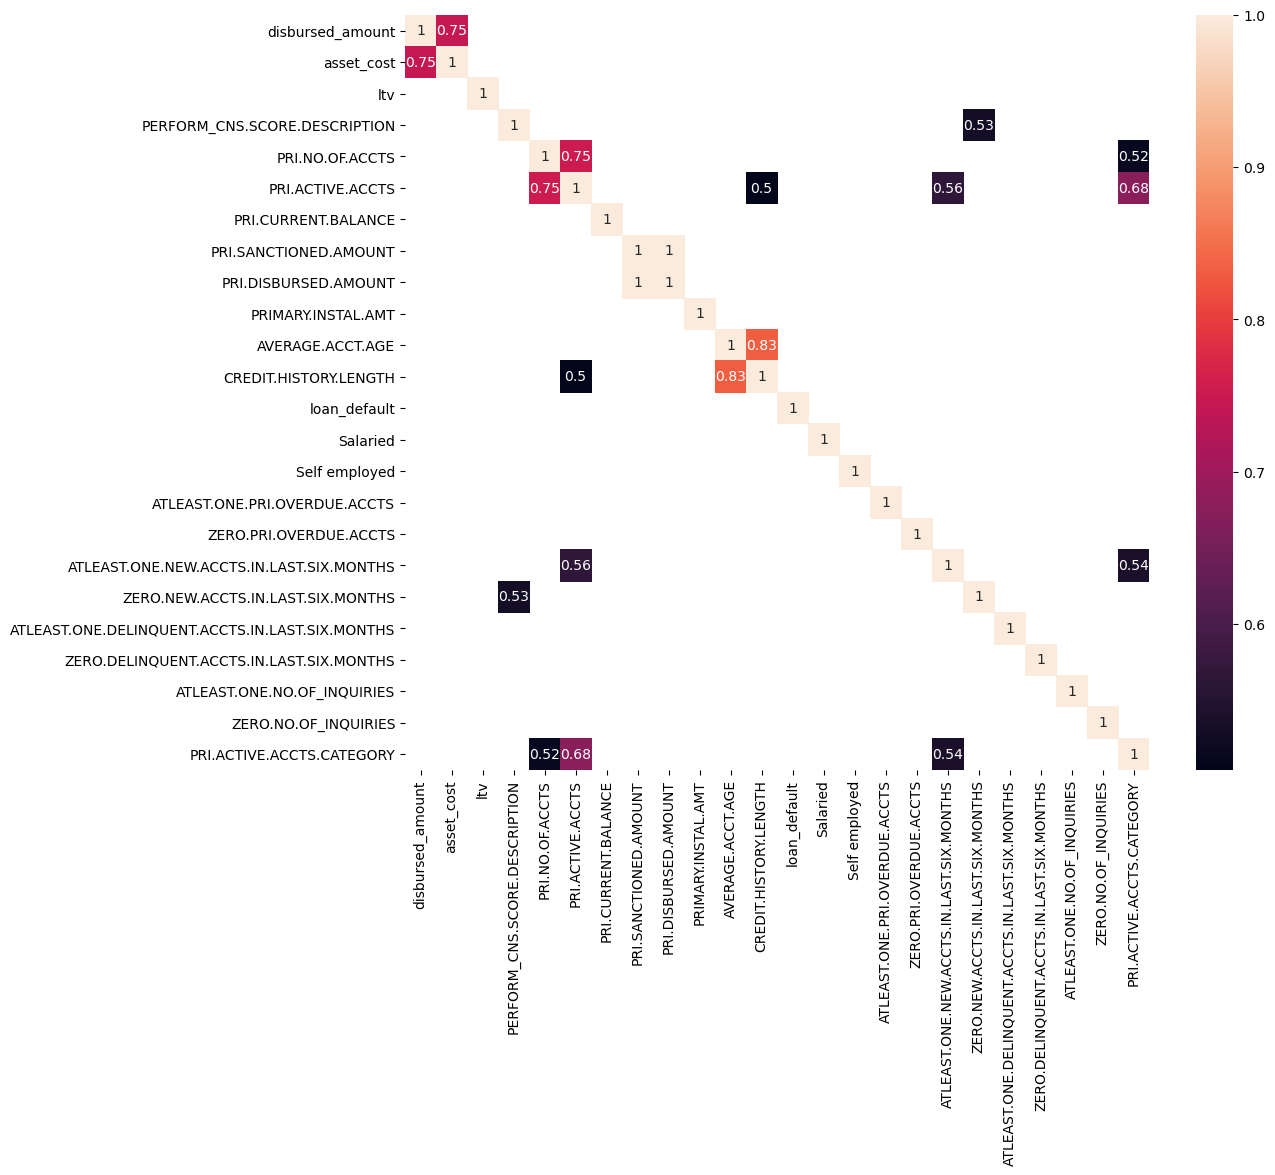

In [126]:
plt.figure(figsize = (12,10), dpi = 100)
sns.heatmap(df_new.corr()[df_new.corr() > 0.5], annot = True)
plt.show()

In [127]:
# we can see some features have high positive correlation among them. Therefore, let's drop these features also

In [128]:
df2 = df_new.copy()

In [129]:
df2.drop(['disbursed_amount','PRI.SANCTIONED.AMOUNT', 'PRI.NO.OF.ACCTS', 'AVERAGE.ACCT.AGE'], axis= 1, inplace = True)

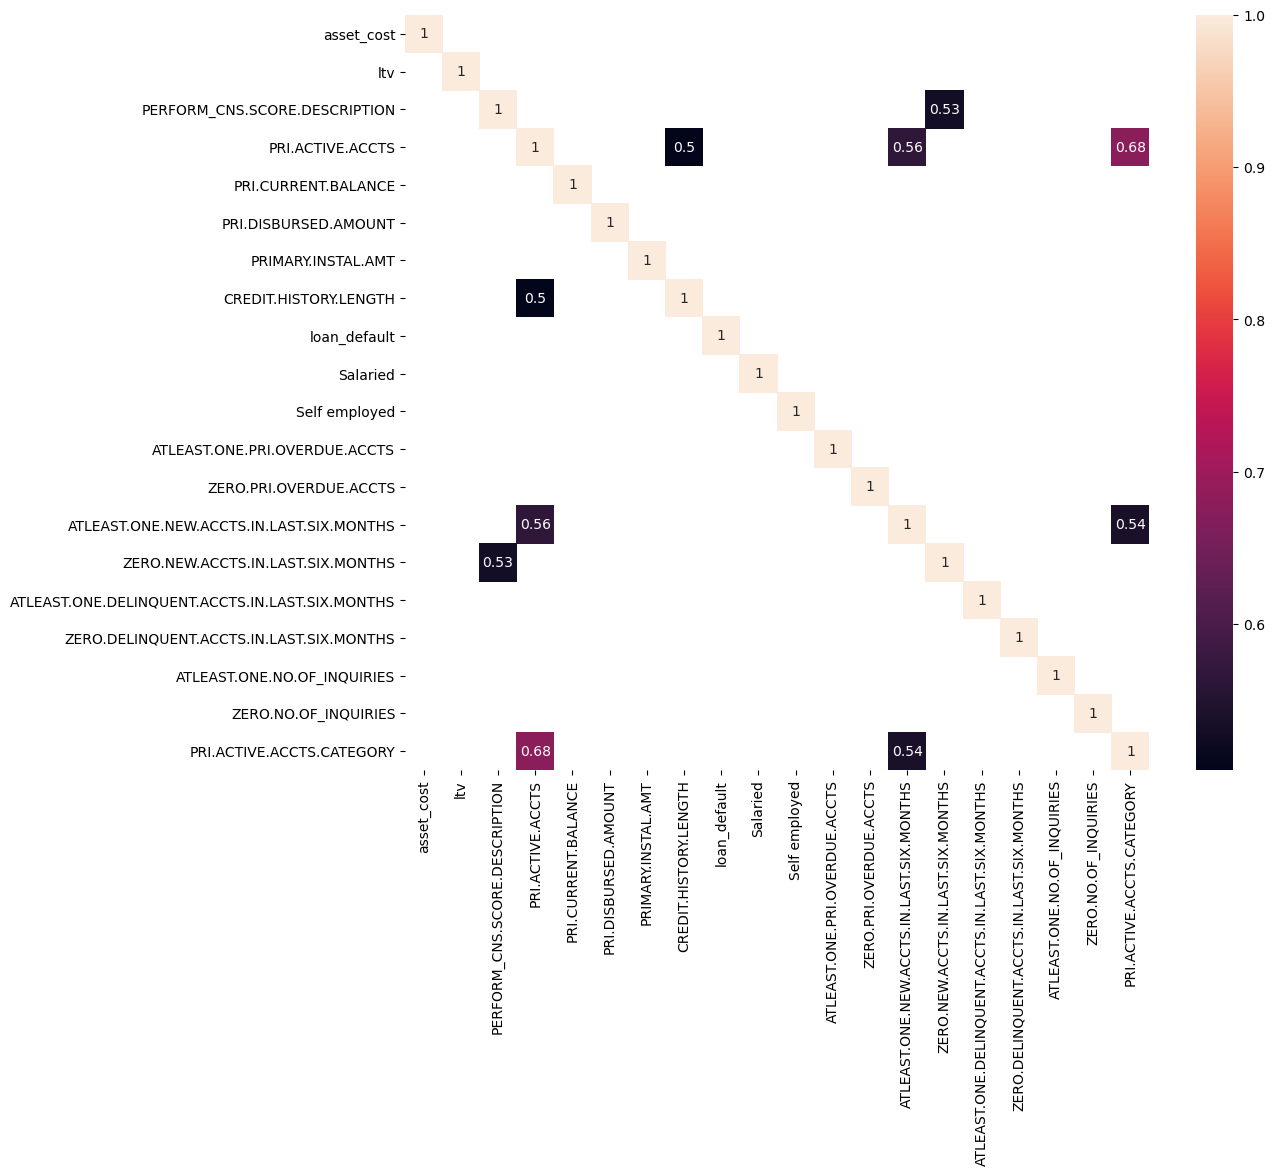

In [130]:
plt.figure(figsize = (12,10), dpi = 100)
sns.heatmap(df2.corr()[df2.corr() > 0.5], annot = True)
plt.show()

In [431]:
# as you can see multicollinearity is geartly reduced.

In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 0 to 233153
Data columns (total 23 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   asset_cost                                       225493 non-null  int64  
 1   ltv                                              225493 non-null  float64
 2   Aadhar_flag                                      225493 non-null  object 
 3   VoterID_flag                                     225493 non-null  object 
 4   PERFORM_CNS.SCORE                                225493 non-null  object 
 5   PERFORM_CNS.SCORE.DESCRIPTION                    225493 non-null  int64  
 6   PRI.ACTIVE.ACCTS                                 225493 non-null  int64  
 7   PRI.CURRENT.BALANCE                              225493 non-null  int64  
 8   PRI.DISBURSED.AMOUNT                             225493 non-null  int64  
 9   PRIMARY.INSTAL.

In [132]:
df2[['Aadhar_flag', 'VoterID_flag', 'PERFORM_CNS.SCORE']] = df2[['Aadhar_flag', 'VoterID_flag', 'PERFORM_CNS.SCORE']].astype('int')

### Creating train and test sets

In [133]:

x = df2.drop('loan_default', axis = 1)
y = df2['loan_default']

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
trainx, testx, trainy, testy = train_test_split(x,y, test_size = 0.3, random_state = 10)

### Balance Class Distributions in the Target class using SMOTE Oversampling technique

In [136]:
from imblearn.over_sampling import SMOTE

In [137]:
sm = SMOTE()

train_x_sm, train_y_sm = sm.fit_resample(trainx, trainy.astype('int'))

In [138]:
train_x_sm.shape

(246878, 22)

In [139]:
train_y_sm.value_counts()

0    123439
1    123439
Name: loan_default, dtype: int64

### Creating Different estimators

In [140]:
#Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf = RandomForestClassifier()

In [143]:
pred_test_rf_sm = rf.fit(train_x_sm, train_y_sm).predict(testx)

In [144]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [145]:
print(accuracy_score(testy, pred_test_rf_sm))

0.8109774124881741


In [146]:
print(classification_report(testy, pred_test_rf_sm))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     53087
           1       0.56      0.55      0.55     14561

    accuracy                           0.81     67648
   macro avg       0.72      0.71      0.72     67648
weighted avg       0.81      0.81      0.81     67648



# GradientBoosting

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

In [149]:
gb = GradientBoostingClassifier()

In [150]:
pred_test_gb_sm = gb.fit(train_x_sm, train_y_sm).predict(testx)

In [151]:
print(accuracy_score(testy, pred_test_gb_sm.astype('int')))

0.8585028382213813


In [152]:
print(classification_report(testy, pred_test_gb_sm.astype('int')))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     53087
           1       0.83      0.43      0.57     14561

    accuracy                           0.86     67648
   macro avg       0.85      0.70      0.74     67648
weighted avg       0.86      0.86      0.84     67648



# Xgboost

In [154]:
from xgboost import XGBClassifier

In [155]:
xg = XGBClassifier(use_label_encoder=False)

In [156]:
pred_test_xg_sm = xg.fit(train_x_sm, train_y_sm).predict(testx)

[20:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [157]:
print(accuracy_score(testy, pred_test_xg_sm.astype('int')))

0.8489090586565752


In [158]:
print(classification_report(testy, pred_test_xg_sm.astype('int')))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     53087
           1       0.74      0.46      0.57     14561

    accuracy                           0.85     67648
   macro avg       0.80      0.71      0.74     67648
weighted avg       0.84      0.85      0.84     67648



# Adaboost

In [159]:
from sklearn.ensemble import AdaBoostClassifier

In [160]:
ad = AdaBoostClassifier()

In [161]:
pred_test_ad_sm = ad.fit(train_x_sm, train_y_sm).predict(testx)

In [162]:
print(accuracy_score(testy, pred_test_ad_sm))

0.8199798959318827


In [163]:
print(classification_report(testy, pred_test_ad_sm))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     53087
           1       0.59      0.54      0.56     14561

    accuracy                           0.82     67648
   macro avg       0.73      0.72      0.72     67648
weighted avg       0.81      0.82      0.82     67648



In [491]:
# we can see realtively higher recall and good precison is given by Adaboost model

### Hypertuning the parameters

In [164]:
from sklearn.model_selection import ParameterGrid

import parfit.parfit as pf

from sklearn.metrics import roc_auc_score, recall_score


In [165]:
#Check first with Adaboost

In [166]:
ad = AdaBoostClassifier()

paramGrid = ParameterGrid({
    'n_estimators': [100,150,175,200,250],
    'learning_rate': [0.1,0.3,0.5,0.7,0.9]    
})


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  9.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 10.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.5min finished


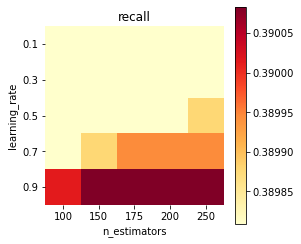

In [167]:
best_model, best_score, all_models, all_scores = pf.bestFit(ad, paramGrid, 
     trainx, trainy, testx, testy, 
     metric=recall_score, scoreLabel='recall')


In [169]:
print(best_model, best_score)

AdaBoostClassifier(learning_rate=0.9, n_estimators=150) 0.3900830986882769


In [170]:
ad_tune = AdaBoostClassifier(learning_rate=0.9, n_estimators=150)

In [171]:
pred_test_ad_sm = ad_tune.fit(train_x_sm, train_y_sm).predict(testx)

In [172]:
print(accuracy_score(testy, pred_test_ad_sm))

0.8502838221381268


In [173]:
print(roc_auc_score(testy, pred_test_ad_sm))

0.707294444382701


# Check with xgboost

In [174]:
xg = XGBClassifier()

paramGrid = ParameterGrid({
    'n_estimators': [100,150,175,200,250],
    'learning_rate': [0.1,0.3,0.5,0.7,0.9],
    
})

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 22.4min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 25.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   15.7s finished


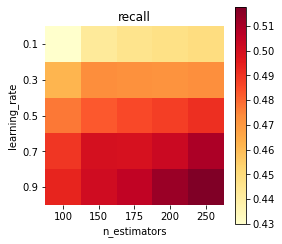

In [175]:
best_model, best_score, all_models, all_scores = pf.bestFit(xg, paramGrid, 
     train_x_sm, train_y_sm, testx, testy, 
     metric=recall_score, scoreLabel='recall')


In [176]:
print(best_model, best_score)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 0.5176842249845478


In [177]:
xgb_tune = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact', validate_parameters=1, verbosity=None)


In [178]:
pred_test_xg_sm = xgb_tune.fit(train_x_sm, train_y_sm).predict(testx)

[21:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [179]:
print(accuracy_score(testy, pred_test_xg_sm))

0.8233946310312205


In [180]:

print(roc_auc_score(testy, pred_test_xg_sm))

0.7124654100980908


In [181]:
#as we can see Adaboost gives high accuracy than xgboost


### Model Evaluation

In [182]:
#Test performance (roc_auc_score)

In [183]:
print(accuracy_score(testy, pred_test_ad_sm))

0.8502838221381268


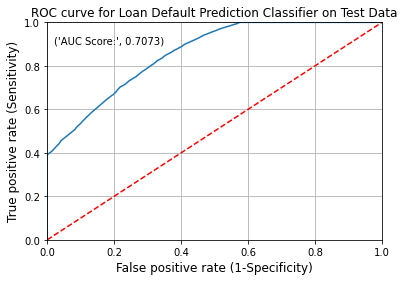

In [184]:
y_pred_prob = ad_tune.predict_proba(testx)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(testy, y_pred_prob)

    # plot the ROC curve
plt.plot(fpr, tpr)

    # set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Loan Default Prediction Classifier on Test Data', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(testy, pred_test_ad_sm),4)))

    # plot the grid
plt.grid(True)

# Train performance (roc_auc_score)

In [185]:
pred_train_ad_sm = ad_tune.fit(train_x_sm, train_y_sm).predict(train_x_sm)

In [186]:
print(accuracy_score(train_y_sm, pred_train_ad_sm))

0.8377133644958239


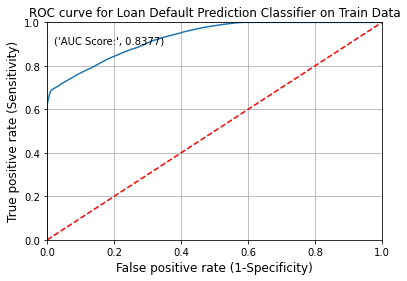

In [187]:
y_pred_prob_train = ad_tune.predict_proba(train_x_sm)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(train_y_sm, y_pred_prob_train)

    # plot the ROC curve
plt.plot(fpr, tpr)

    # set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Loan Default Prediction Classifier on Train Data', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(train_y_sm, pred_train_ad_sm),4)))

    # plot the grid
plt.grid(True)

# Mean_cross_validation_recall_score

In [188]:
from sklearn.model_selection import cross_val_score

In [189]:
score_val = cross_val_score(ad, train_x_sm, train_y_sm, cv = 5, scoring = 'recall')

In [190]:
score_val

array([0.40614874, 0.72735742, 0.85162832, 0.852716  , 0.84940052])

In [191]:
fold = ['F1', 'F2', 'F3', 'F4', 'F5']

C:\Users\Naman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


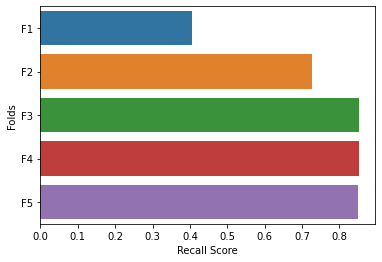

In [192]:
sns.barplot(score_val, fold)
plt.xlabel('Recall Score')
plt.ylabel('Folds')
plt.show()

In [193]:
print(score_val.mean())

0.7374502002268664


### Feature Selection

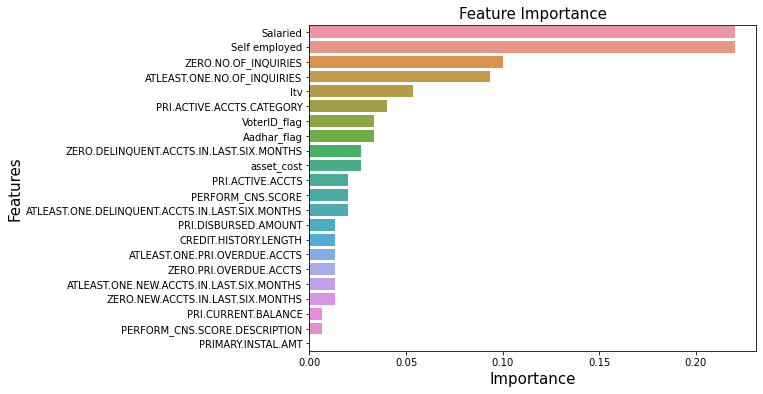

In [194]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': train_x_sm.columns, 
                                   'Importance': ad_tune.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize = (8,6))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()


In [195]:
# We can finally see that there's no overfitting issue in our model, as after using SMOTE, the accuracy score
# of both train and test set is very much close to each other.
# We also see that our Adaboost model attains a significant high roc auc score of 70.8% on test set and a mean cross validation recall score of 73.5% on the validation set.